# Goals
    1. Mendapatkan profit yang maksimal di bulan depan dengan Campaign penawaran produk baru
    2. Memahami karakteristik customers yang akan menerima Campaign

# EDA
    1. Data Quality Check
    2. Data Insight

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None) #Menampilkan seluruh kolom

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Data Quality Check
    1. Cek data type tiap features
    2. Cek duplicate, missing value, outliers
    3. Cek distribusi yang tidak masuk akal

## 1. Cek data type tiap features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
df.columns = df.columns.str.replace(' ', '') #Memperbaiki kolom income yang typo

In [10]:
df['Income'] = df['Income'].str.replace('$', '') #Menghilangkan simbol $ pada kolom Income

In [11]:
df['Income'] = df['Income'].str.replace(',', '') #Menghilangkan koma pada kolom Income

# Karena $ dan koma yang menjadikan kolom Income menjadi data type Object

In [12]:
df.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [ ]:
# Features yang tidak sesuai adalah Income, Dt_Customer

In [13]:
df['Income'] = df['Income'].astype('float')

In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## 2. Cek duplicate, missing value, outliers

In [16]:
# Cek duplicate
df.duplicated().sum()

0

In [17]:
# Missing Values
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [ ]:
# Terdapat 1 feature yang terdapat missing value yaitu Income

<Axes: >

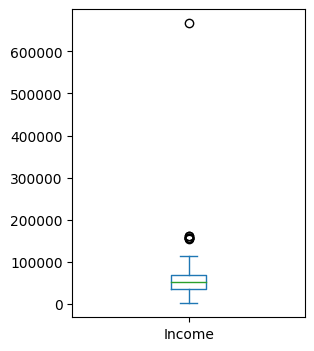

In [18]:
df['Income'].plot(kind='box', figsize=(3,4))

In [19]:
# Karena terdapat outlier yang lumayan jauh, lebih efektif menggunakan Median
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
# Outlier

In [23]:
# Cek Kolom-kolom yang Continious
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
               inplace=True)

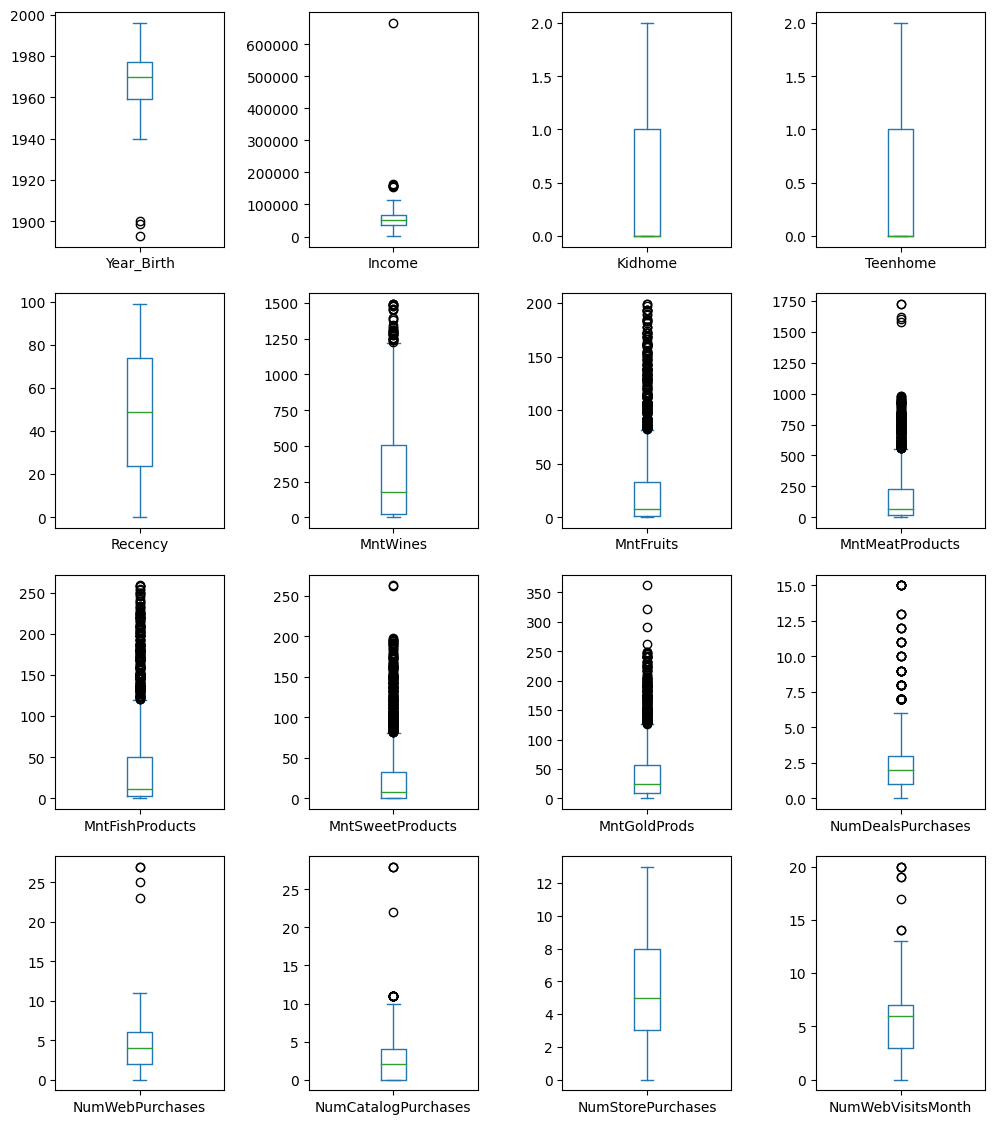

In [30]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

In [32]:
# Pada Year_Birth terdapat customer yang lahir dibawah/sekitar tahun 1900
# Terdapat beberapa yang outliers tapi masih tergolong mungkin/masuk akal

In [33]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

## 3. Cek distribusi yang tidak masuk akal

In [34]:
# Cek seluruh distribusi variabel numerik atau continious

In [35]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

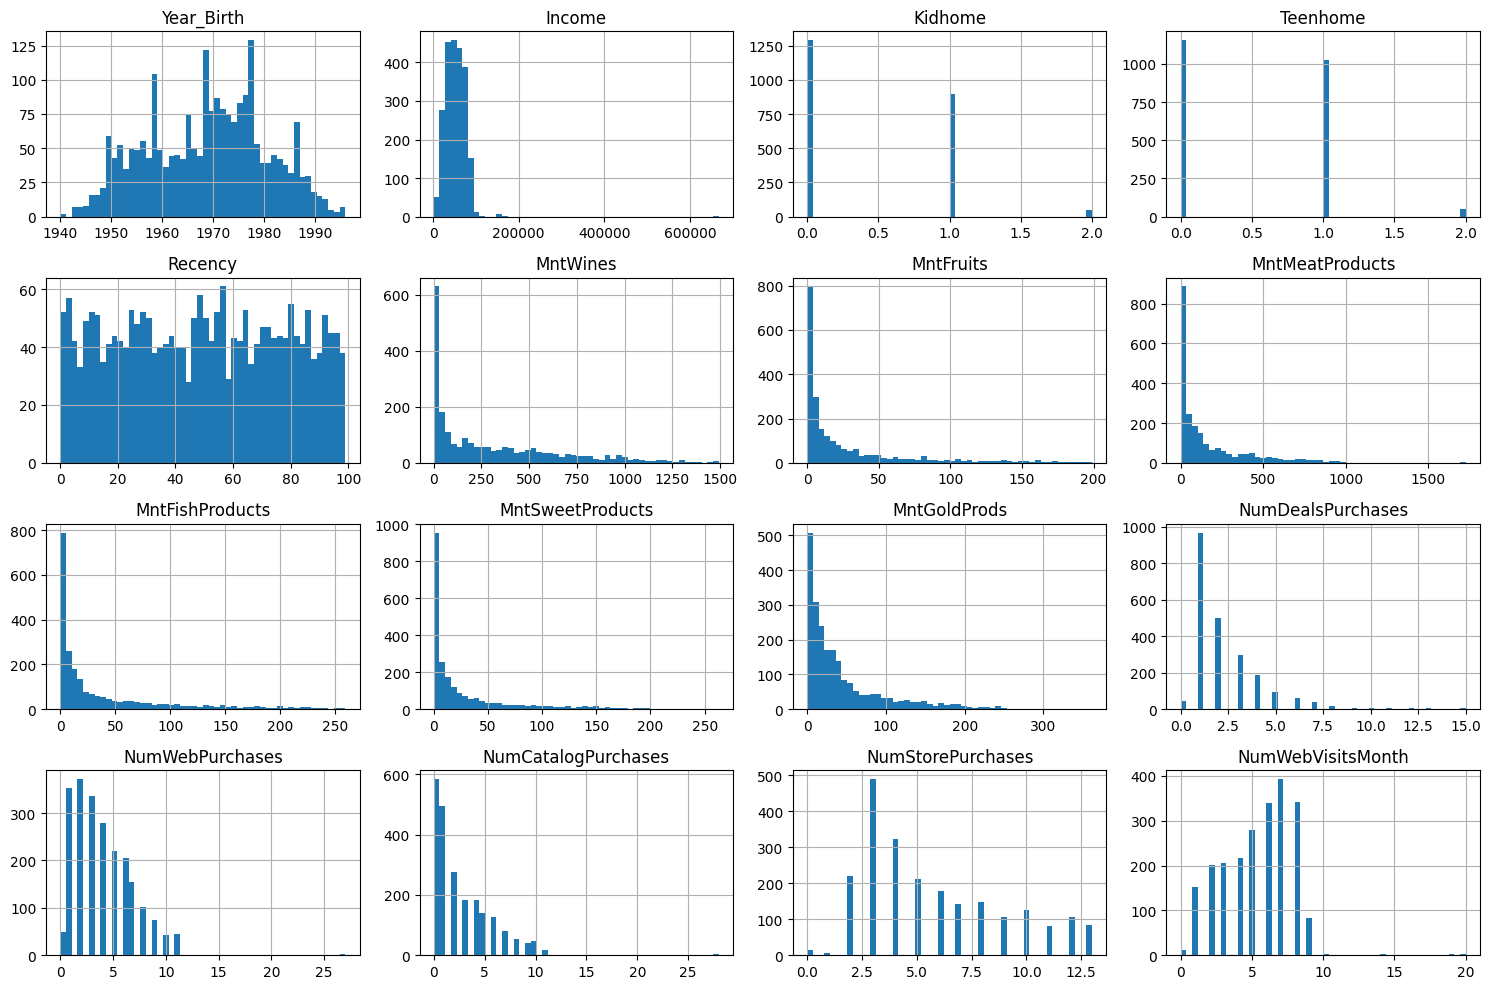

In [37]:
fix = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout();

In [ ]:
# Setelah melihat histogram diatas, tidak terdapat distribusi yang tidak masuk akal

# Data Insight

In [46]:
# Bertujuan untuk melihat insight dari semua kolom yang ada
# Melihat suatu pattern dari semua kolom dengan target(response)

# Keterangan = response 0 tidak menerima Campaign
#              response 1 menerima Campaign

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
# Kolom ID hanya untuk indeksing

## Year Birth

In [ ]:
# Melihat rentang umur yang menerima campaign

In [ ]:
# Untuk mencari umur yaitu mencari tahun dari Dt_Customer - Year_Birth

In [39]:
df['Dt_Customer'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2232    2013
2233    2013
2234    2012
2235    2012
2236    2012
Name: Dt_Customer, Length: 2237, dtype: int64

In [40]:
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
# Customer Age adalah umur costomer ketika pertama kali join/mendaftar

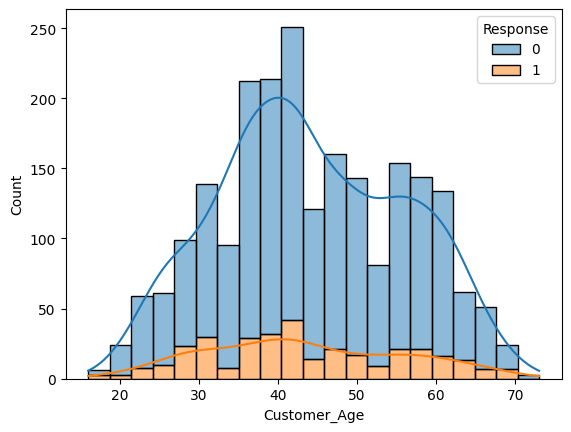

In [45]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True);

In [ ]:
# Response 0 dan 1 memiliki pola yang hampir sama sehingga informasi yang didapatkan tidak ada/signifikan
# Umur customer rata-rata 40an

## Education

In [47]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

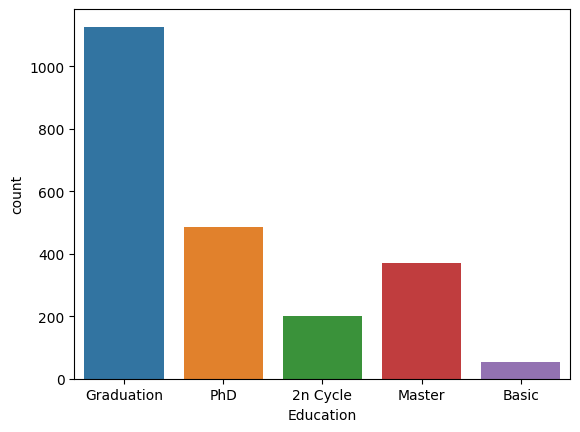

In [49]:
sns.countplot(data=df, x='Education');

In [ ]:
# Rata-rata customer lulusan Graduation

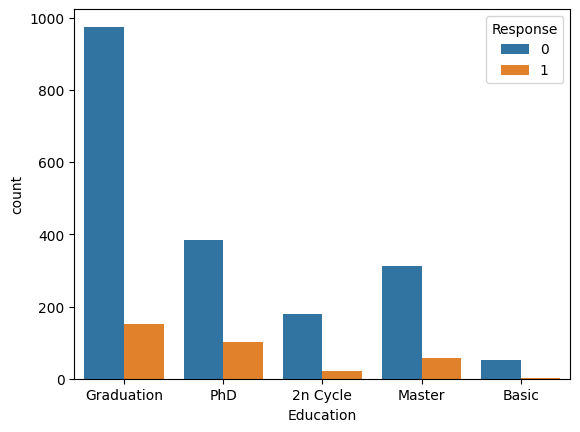

In [51]:
sns.countplot(data=df, x='Education', hue='Response');

In [60]:
# Function Bar Percentage
def barPerc(df,xVar,ax):
    numX = len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches
    
    for ind in range(numX):
        hueBars = bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

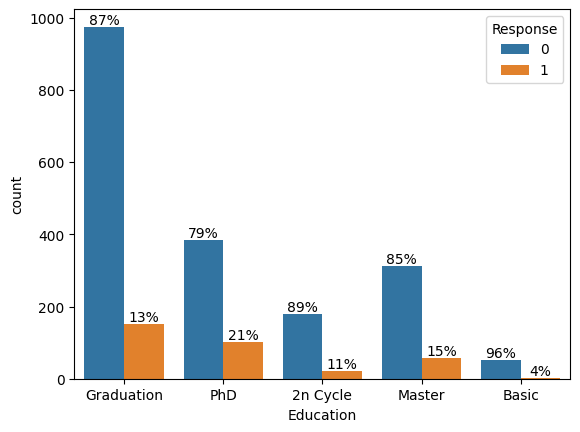

In [61]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

In [ ]:
# Lulusan PhD lebih cenderung menerima Campaign

## Marital Status

In [65]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [66]:
# Single, YOLO, Alone, Absurd dianggap sama

In [67]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
#Melakukan mapping YOLO, Alone, Absurd menjadi Single, tetapi yang lain nilainya tetap sama

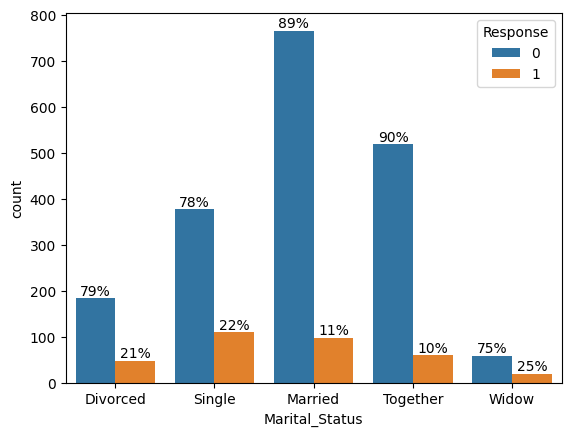

In [68]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

In [69]:
# Divorced dan Widow mungkin atau bisa tinggal sendiri, Single sudah pasti tinggal sendiri
# Tinggal sendiri cenderung menerima Campaign

## Income

In [ ]:
# Menghubungkan Income dengan Education karena biasanya semakin tinggi Education semakin tinggi Income

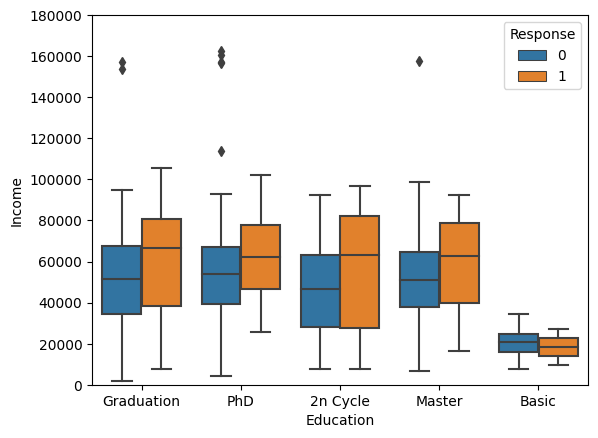

In [70]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 180000);

In [71]:
# Lulusan Graduation, PhD, 2n Cycle, Master rata-rata memiliki income yang sama
# Response 1 memiliki rata-rata income yang lebih tinggi dari response 0
# Income yang tinggi cenderung menerima Campaign

## Kidhome + Teenhome

In [72]:
# Jumlah anak yang dimiliki customer baik itu kid atau teen
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

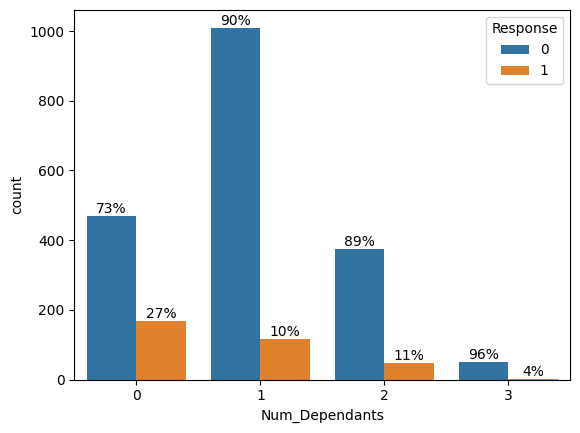

In [73]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=df)
barPerc(df, 'Num_Dependants', ax)

In [ ]:
# Customer yang tidak memiliki anak cenderung menerima Campaign
# Juga customer yang tinggal sendiri atau tidak mempunyai tanggunan cenderung menerima Campaign

## Dt_Customer

In [74]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

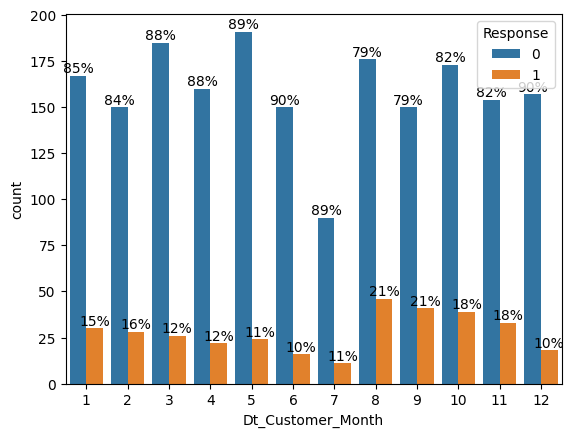

In [75]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

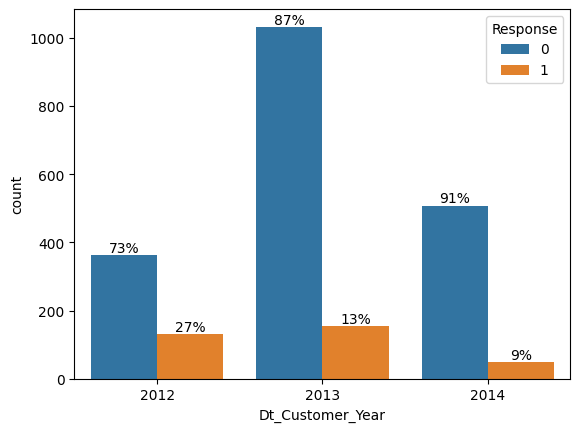

In [76]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

In [77]:
# Customer yang sudah lama join cenderung menerima Campign

## Recency

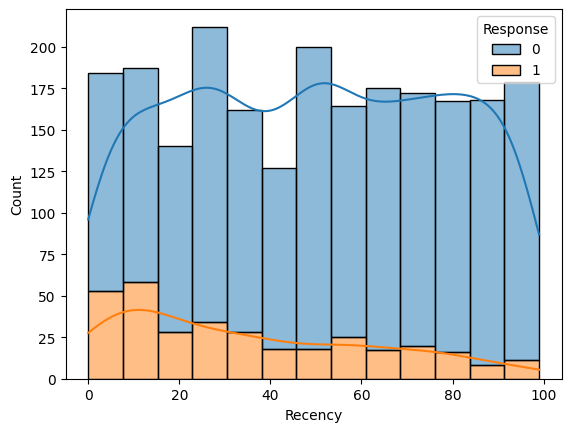

In [79]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True);

In [80]:
# Customer response 0 cukup flat karena naik turun
# Customer response 1 memeliki nilai Recency yang cukup rendah atau menurun

# Customer yang belum lama melakukan transaksi cenderung menerima Campaign

## Amount Spent

In [82]:
# Kolom Mnt memiliki jenis produk yang berbeda dan akan dianalisi/eksplor secara sekaligus
mnt_features = [c for c in df.columns if 'Mnt' in str(c)]
mnt_features.append('Response')

In [87]:
df[mnt_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [ ]:
# Nilai Korelasi bernilai positif berarti nilai Amount Spent (Mnt) customer meningkat/bertambah
# Nilai Korelasi terbesar hanya 24% sehingga tidak terlalu tinggi

In [89]:
mnt_features = [c for c in df.columns if 'Mnt' in str(c)]
df[mnt_features]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2232,372,18,126,47,48,78
2233,5,10,13,3,8,16
2234,185,2,88,15,5,14
2235,267,38,701,149,165,63


In [90]:
# Melakukan penjumlahan Mnt untuk masing-masing customer
df['Total_mnt'] = df[mnt_features].sum(axis=1)

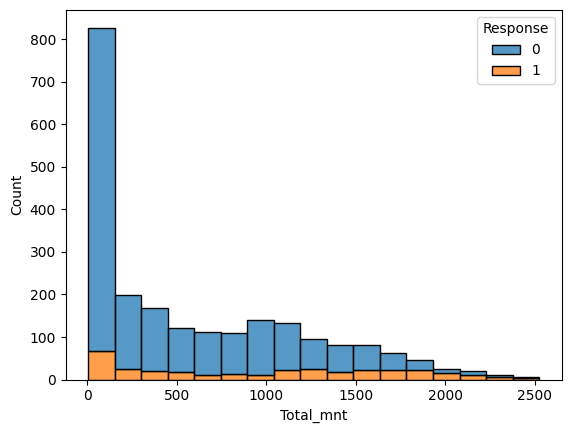

In [112]:
sns.histplot(data=df, x='Total_mnt', hue='Response', kde=False, multiple='stack');

In [ ]:
# Pada Response 0 naik pada spend 1000 kemudian menurun setelahnya
# Pada Response 1 terjadi pola unik pada spent 1000-2000 yaitu flat, berarti customer cenderung menerima Campaign pada spent tersebut

## Purchases

In [94]:
# Melakukan hal yang sama pada kolom Purchase dianalisi/eksplor secara sekaligus
purchase_features = [c for c in df.columns if 'Purchase' in str(c)]
purchase_features.append('Response')

In [95]:
df[purchase_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [ ]:
purchase_features = [c for c in df.columns if 'Purchase' in str(c)]
df[purchase_features]

In [97]:
df['Total_purchases'] = df[purchase_features].sum(axis=1)

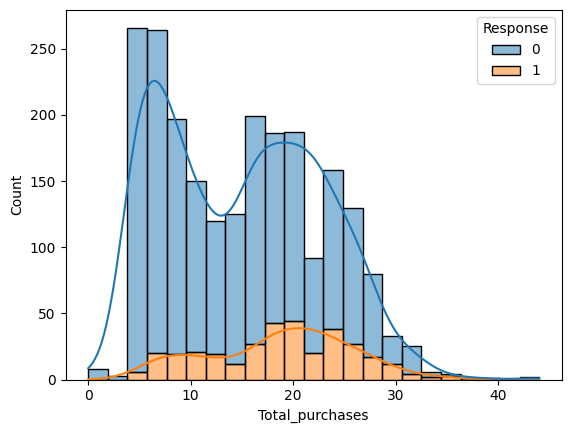

In [99]:
sns.histplot(data=df, x='Total_purchases', hue='Response', kde=True, multiple='stack');

In [ ]:
# Terdapat kesamaan pola pada Response 0 dan 1

## NumWebVisitsMonth

In [100]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


In [101]:
# Korelasi bernilai negatif dan mendekati 0 sehingga tidak memiliki korelasi dengan Response

## Previous Campaign

In [102]:
# Status Campaign sebelumnya yaitu customer yang menerima atau tidak menerima campaign-campaign sebelumnya
previous_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
previous_cmp.append('Response')

In [103]:
df[previous_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


In [104]:
previous_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
df[previous_cmp]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2232,0,0,0,0,0
2233,0,0,0,0,0
2234,0,0,0,0,0
2235,0,0,0,0,0


In [105]:
df['Total_Acc_cmp'] = df[previous_cmp].sum(axis=1)

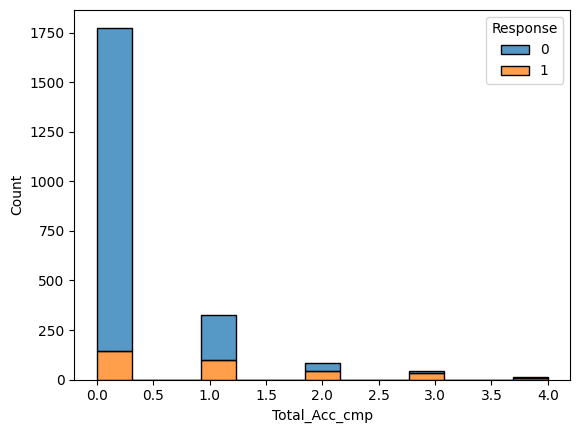

In [106]:
sns.histplot(data=df, x='Total_Acc_cmp', hue='Response', kde=False, multiple='stack');

## Complain

In [107]:
df[['Complain', 'Response']].corr()[['Response']]

,Response
Complain,0.000185
Response,1.000000


In [108]:
# Korelasi mendekati 0

## Country

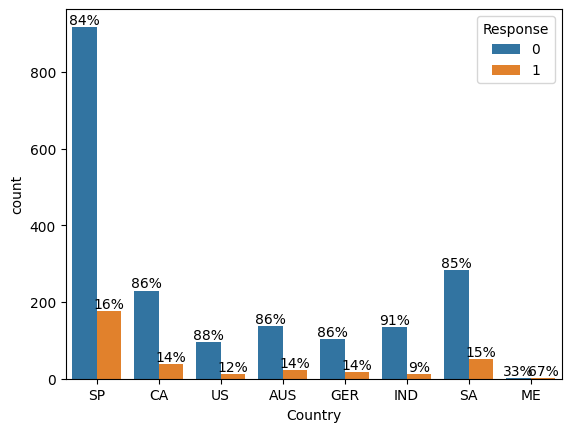

In [109]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

In [110]:
# Customer berasal dari ME (Meksiko) cenderung menerima Campaign
# Customer berasal dari SP (Spain) cenderung menerima Campaign